<a href="https://colab.research.google.com/github/narayana-pmt20/AI-Expeditions/blob/main/Fraud%20Analysis%20(March%209%2C%202025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries / Dataset

##1a. Import Libraries

In [167]:
 # initial definitions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




##1b. Import Libraries/Dataset



In [168]:


# Configure matplotlib to display plots inline within the notebook
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/0-BITS/S1/ML/Assignment_1/data_FinancialTransactions.csv'
fin_data = pd.read_csv(file_path, delimiter=",", header=0, parse_dates=['Date'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Data Visualization and Exploration [1M]


## 2a. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.


In [169]:
# Print dataset shape and summary information

display(fin_data.head())
print("Dataset Shape:", fin_data.shape)
fin_data.info()

Unnamed: 0      Amount       Date Card Type MCC Category Location   Device  \
0           0  180.924993 2023-07-02     Debit  Electronics       UK  Desktop   
1           1  794.625797 2023-02-18   Prepaid    Groceries   Canada  Desktop   
2           2  818.413303 2023-01-02   Prepaid  Electronics       UK      POS   
3           3  530.306522 2023-03-21    Credit  Restaurants       US   Mobile   
4           4  649.101853 2023-08-28     Debit  Electronics   Canada  Desktop   

   Previous Transactions  Balance Before Transaction  Time of Day  Velocity  \
0                      6                  919.055267           10 -0.337955   
1                      5                 3529.930762           17  0.015117   
2                      5                 6578.889931            4 -0.198457   
3                      3                 8036.856328           20 -0.076741   
4                      4                 5342.795887           16 -0.029077   

   Customer Age  Customer Income    Card Limit  Credit Score  \
0            52     105545.34050   2503.758986           401   
1            62      92651.85441  12885.681730           409   
2            42      90579.47928   2039.105869           323   
3            76      63777.18432   5568.880208           674   
4            39      30620.99808   6945.439545           533   

  Merchant Reputation  Merchant Location History  Spending Patterns  \
0             Average                          6         828.820298   
1             Average                         13        4384.528307   
2                Good                          1         733.282224   
3                 Bad                          1         670.074148   
4                Good                          3         550.619875   

  Online Transactions Frequency  Is Fraudulent  
0                        Medium              0  
1                           Low              1  
2                          High              0  
3                          High              0  
4                           Low              0

Dataset Shape: (1000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     1000 non-null   int64         
 1   Amount                         1000 non-null   float64       
 2   Date                           1000 non-null   datetime64[ns]
 3   Card Type                      1000 non-null   object        
 4   MCC Category                   1000 non-null   object        
 5   Location                       1000 non-null   object        
 6   Device                         1000 non-null   object        
 7   Previous Transactions          1000 non-null   int64         
 8   Balance Before Transaction     1000 non-null   float64       
 9   Time of Day                    1000 non-null   int64         
 10  Velocity                       1000 non-null   float64     

## 2b. Provide appropriate data visualizations to get an insight about the dataset.


###Visualization 1 - Pair Plot

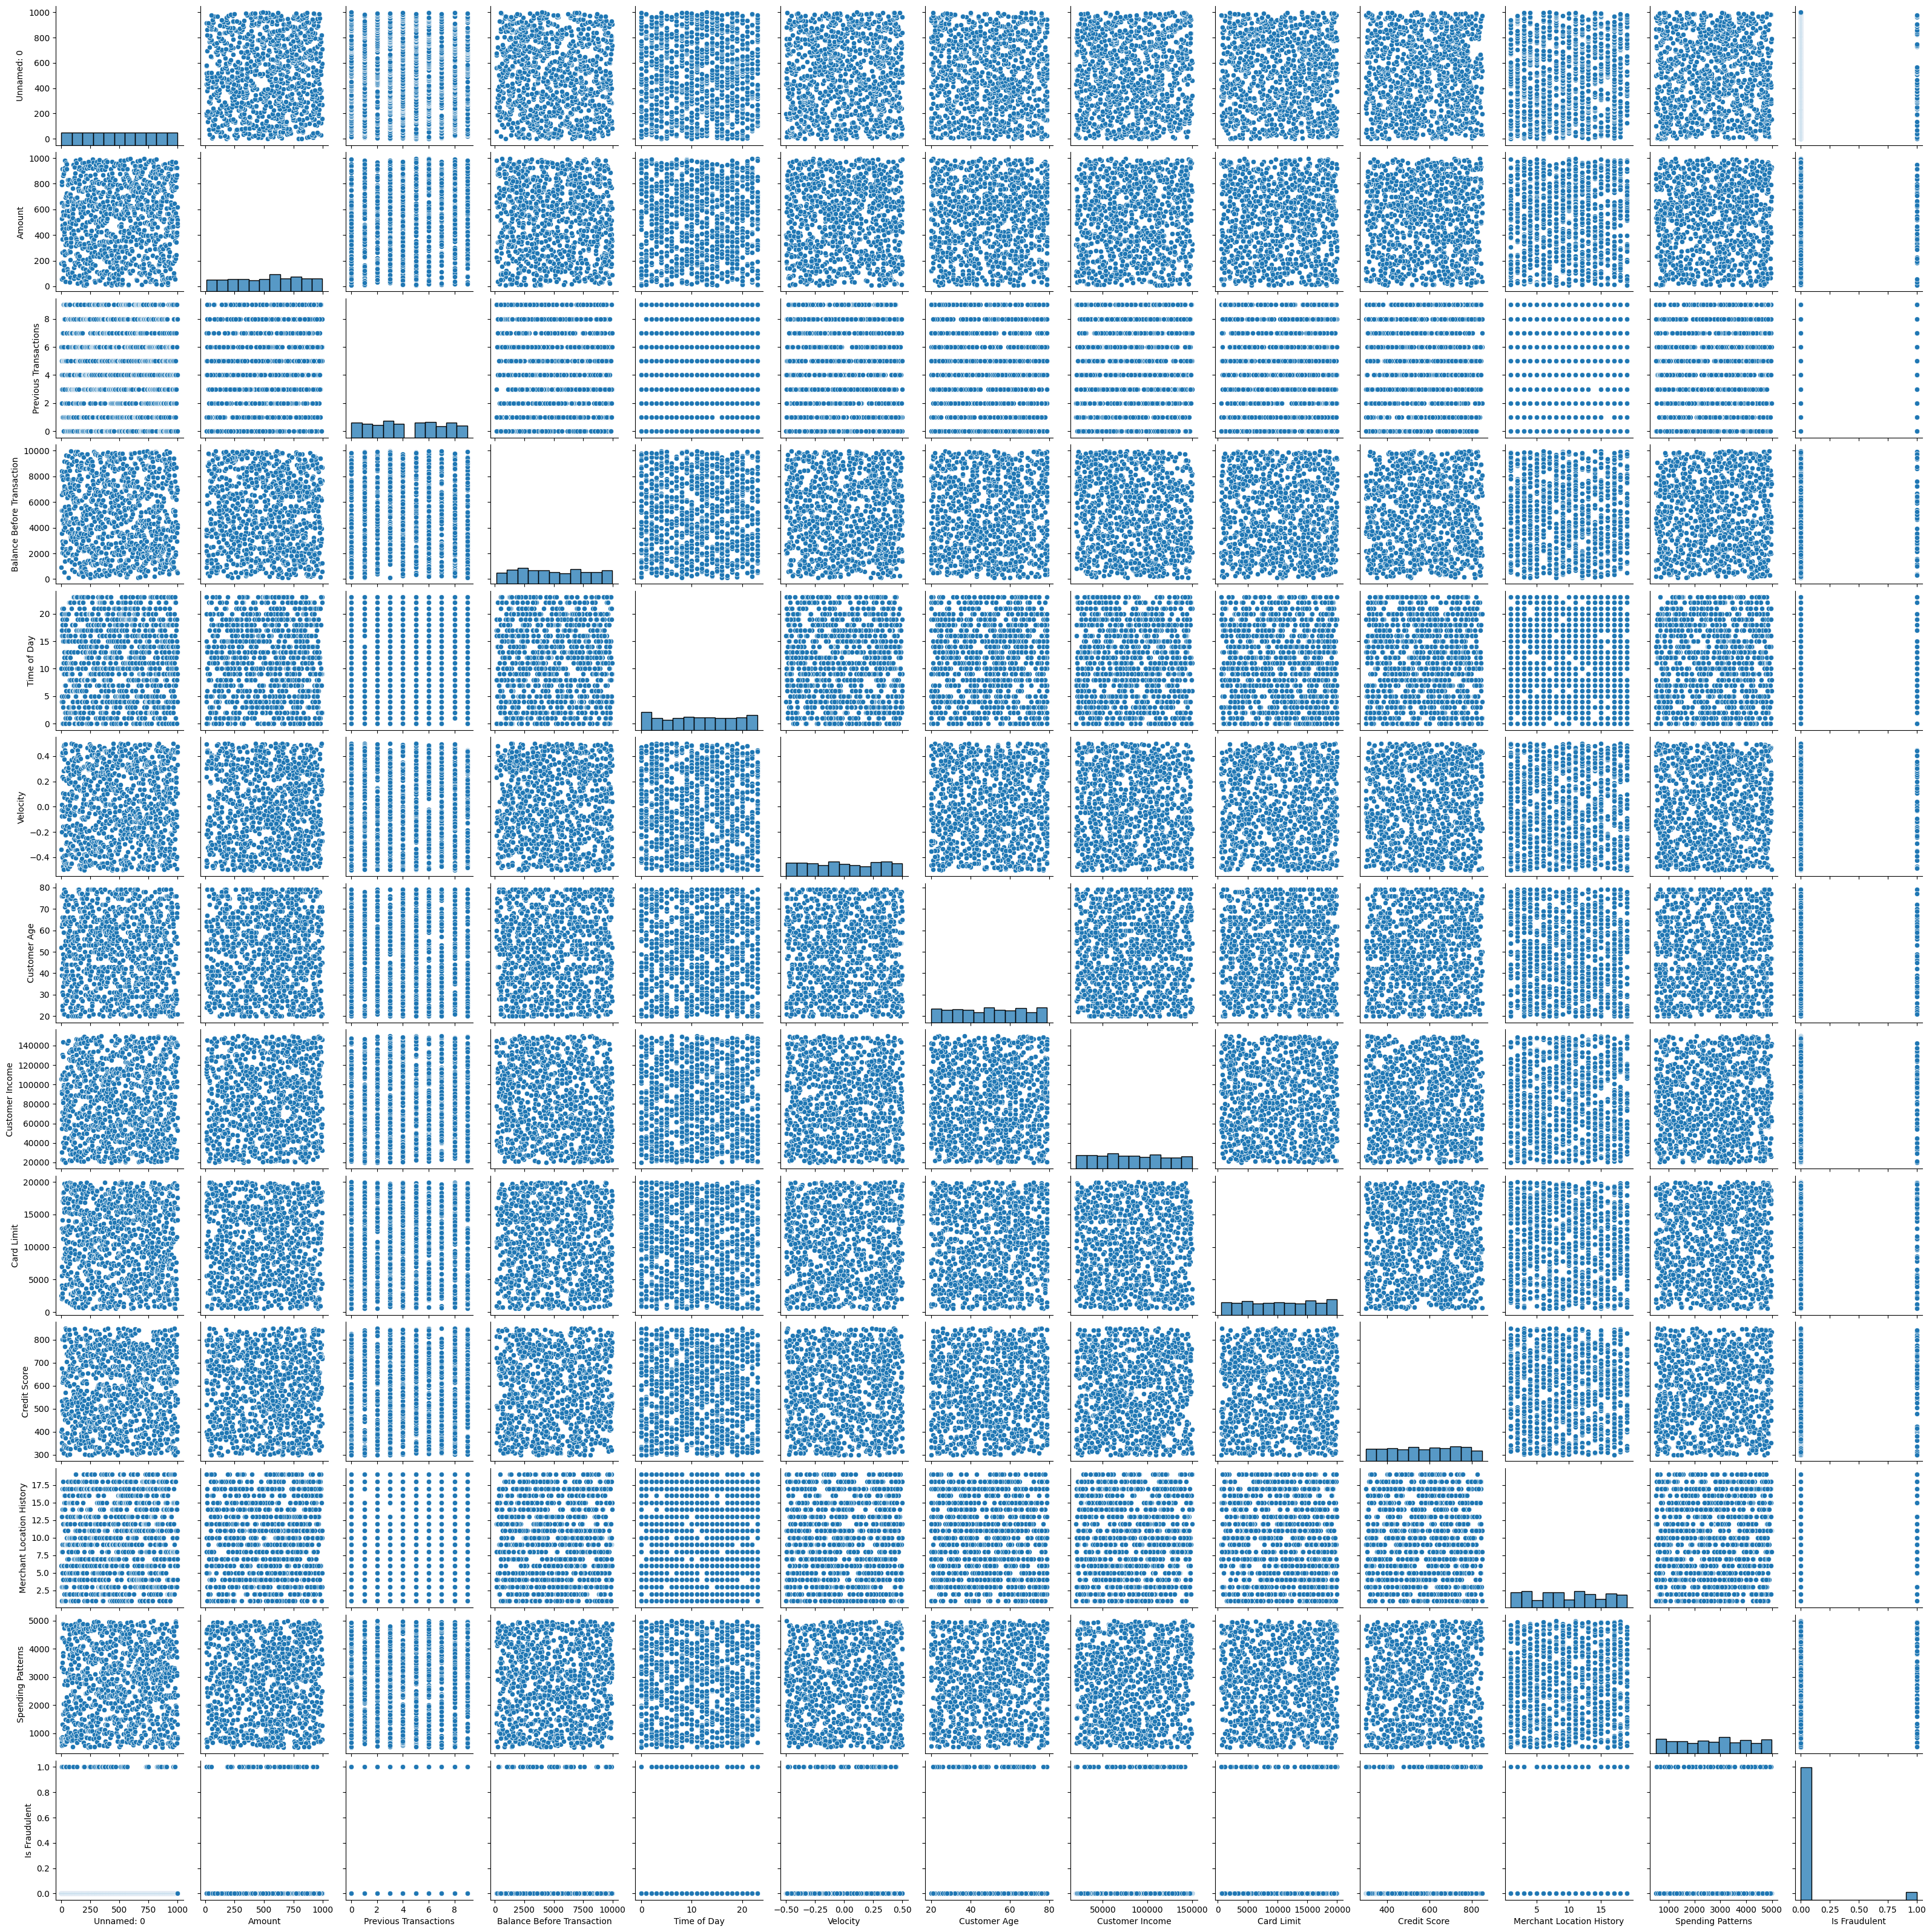

In [170]:
import seaborn as sns
sns.pairplot(fin_data)

###Visualization 2 - Distribution of Transaction Amounts

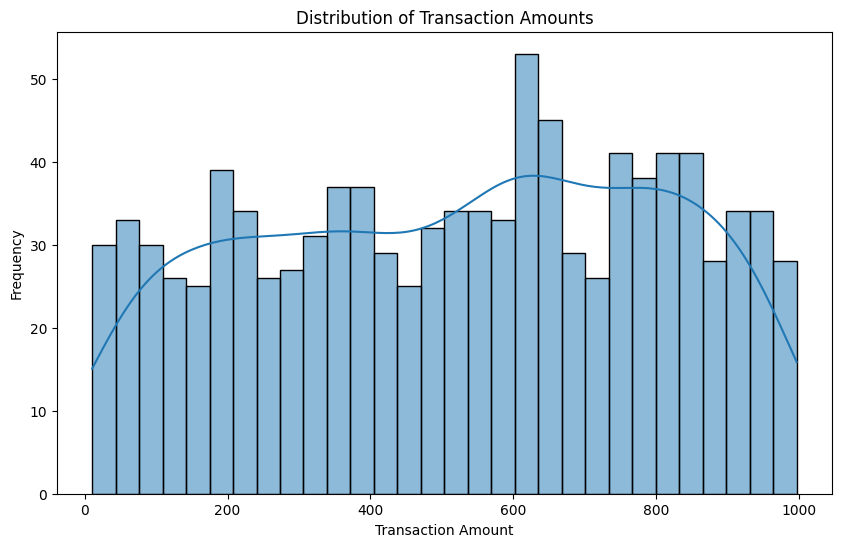

In [171]:
# Visualization 1: Distribution of Transaction Amounts

plt.figure(figsize=(10, 6))
sns.histplot(fin_data['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### Visualization 2 - Count Plot of Fraudulent vs Legitimate Transactions

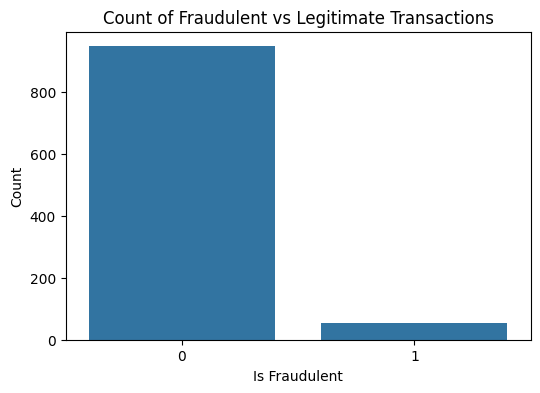

In [172]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Is Fraudulent', data=fin_data)
plt.title('Count of Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.show()

### Visualization 3: - Boxplot of Transaction Amount by Card Type


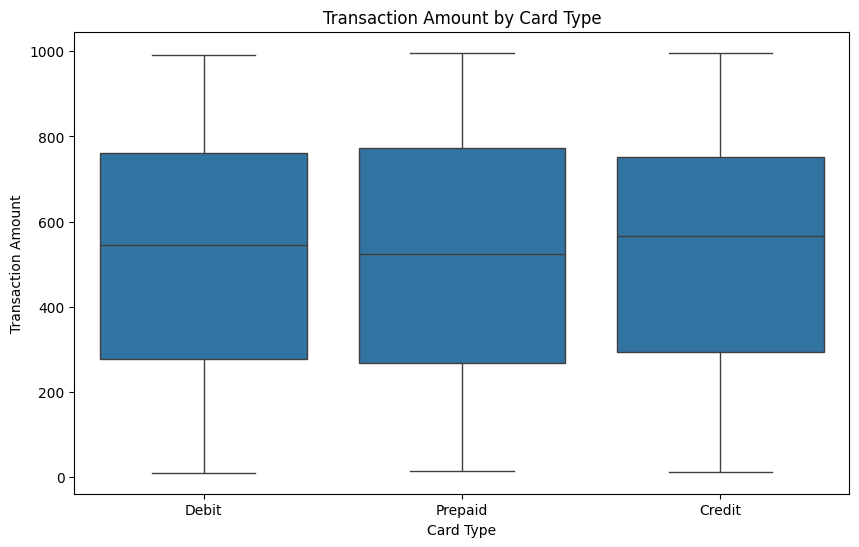

In [173]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Card Type', y='Amount', data=fin_data)
plt.title('Transaction Amount by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Transaction Amount')
plt.show()

### Visualization 4 - Time Series Plot of Average Transaction Amount Over Time
Extracting only the date portion for daily aggregation

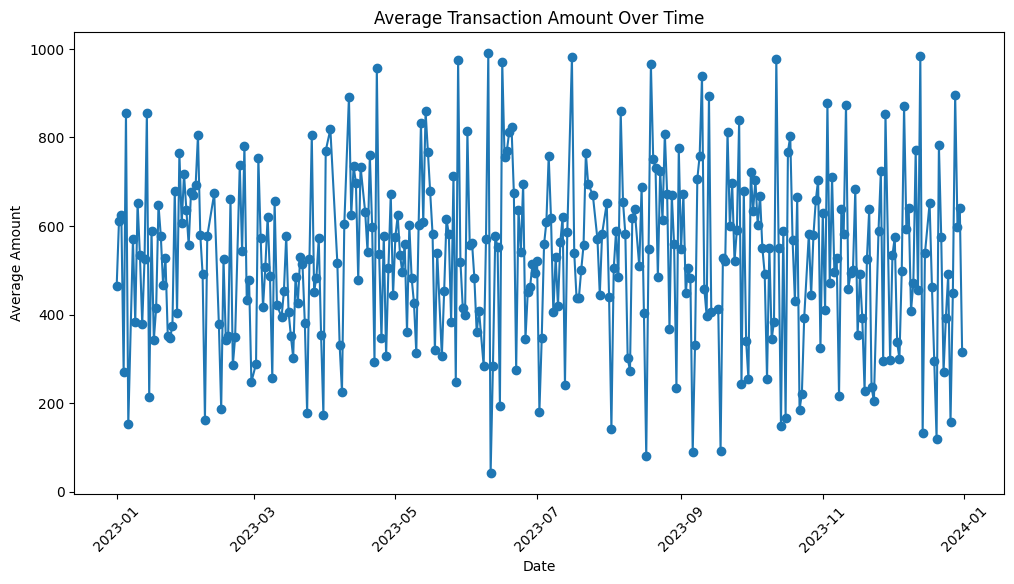

In [174]:

fin_data['DateOnly'] = fin_data['Date'].dt.date
daily_amount = fin_data.groupby('DateOnly')['Amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_amount['DateOnly'], daily_amount['Amount'], marker='o')
plt.title('Average Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()

## 2c. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer.

We have following numerical features:



1.   Amount
2.   Previous Transactions
3.   Balance Before Transaction
4.   Time of Day
5.   Velocity
6.   Customer Age
7.   Customer Income
8.   Card Limit
9.   Credit Score
10.  Merchant Location History
11.  Spending Patterns



Let's check correlations

Correlation Matrix:
                            Unnamed: 0    Amount  Previous Transactions  \
Unnamed: 0                    1.000000  0.025003               0.008809   
Amount                        0.025003  1.000000               0.128913   
Previous Transactions         0.008809  0.128913               1.000000   
Balance Before Transaction   -0.031327 -0.020222              -0.058083   
Time of Day                   0.010370  0.038298              -0.055533   
Velocity                      0.020716  0.021575               0.018358   
Customer Age                 -0.036951  0.004987              -0.011379   
Customer Income               0.001747  0.055740              -0.000367   
Card Limit                   -0.008620  0.003503               0.054903   
Credit Score                  0.035093 -0.023363              -0.002971   
Merchant Location History     0.040427 -0.002497               0.008733   
Spending Patterns            -0.016161  0.000878               0.066043   
Is Fr

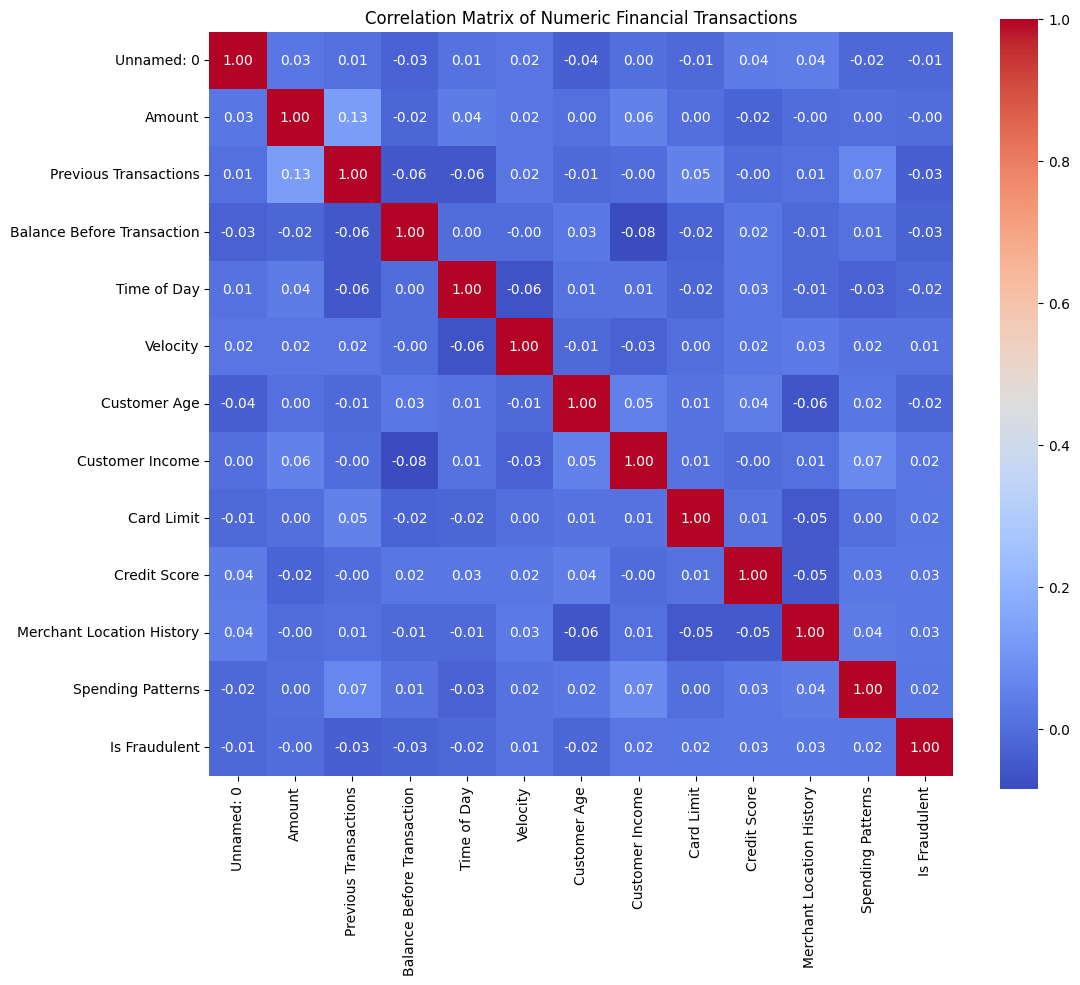

In [175]:
#numeric_data = fin_data[["Amount", "Previous Transactions", "Balance Before Transaction", "Time of Day", "Velocity", "Customer Age", "Customer Income", "Card Limit", "Credit Score", "Merchant Location History", "Spending Patterns"]]
numeric_data = fin_data.select_dtypes(include=['number'])

#calculate the correlation matrix for numeric features
corr_matrix = numeric_data.corr()
# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

pd.DataFrame.corr(numeric_data)

# Visualization: Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Financial Transactions')
plt.show()


---
###Learnings from Correlation Analysis

In the context of the Financial Transactions dataset, the correlational analysis will directly impact our feature selection strategy. For example, consider the following specifics:


* None of the features shows a very high correlation (e.g., above 0.8) with either the target (Is Fraudulent) or with each other, suggesting that:
* No single feature is highly predictive on its own.
* All correlations with `Is Fraudulent` are relatively small (close to zero), which is typical in real-world fraud datasets.
* Fraud often depends on a combination of subtle signals rather than a single strongly correlated factor.
* There is no extreme redundancy among numeric features.
* While certain pairs like `Customer Income` and `Spending Patterns` show a moderate positive correlation, it is not large enough (e.g., >0.8) to consider dropping one of them outright. In practice, moderate correlation (0.4–0.6) does not necessarily mean you must remove or merge those features.
* Unnamed: 0 appears to be an index column and does not hold predictive value. We can safely drop it as it provides no actual information about the transaction.

---




###Which Features to Keep?



1.   Drop `Unnamed: 0`. This is just an index and not a real feature.
2.   Retain the other numeric columns — `Amount`, `Previous Transactions`, `Balance Before Transaction`, `Time of Day`, `Velocity`, `Customer Age`, `Customer Income`, `Card Limit`, `Credit Score`, `Merchant Location History`, `Spending Patterns` — since none of them are excessively correlated with each other or with the target.
3. Retain relevant categorical columns (not shown in the correlation matrix, e.g., `Card Type`, `MCC Category`, `Device`, etc.) after appropriate encoding, because they can provide additional signals that won’t appear in a numeric correlation heatmap.

---

#3. Data Pre-processing and cleaning

## 3a. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell.

In [176]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     1000 non-null   int64         
 1   Amount                         1000 non-null   float64       
 2   Date                           1000 non-null   datetime64[ns]
 3   Card Type                      1000 non-null   object        
 4   MCC Category                   1000 non-null   object        
 5   Location                       1000 non-null   object        
 6   Device                         1000 non-null   object        
 7   Previous Transactions          1000 non-null   int64         
 8   Balance Before Transaction     1000 non-null   float64       
 9   Time of Day                    1000 non-null   int64         
 10  Velocity                       1000 non-null   float64       
 11  Customer Age      

In [177]:
fin_data.describe()

Unnamed: 0       Amount                        Date  \
count  1000.000000  1000.000000                        1000   
mean    499.500000   520.177431  2023-06-30 01:59:31.200000   
min       0.000000    10.456991         2023-01-01 00:00:00   
25%     249.750000   277.978547         2023-03-25 00:00:00   
50%     499.500000   546.816714         2023-06-29 00:00:00   
75%     749.250000   760.074571         2023-10-02 06:00:00   
max     999.000000   996.689893         2023-12-31 00:00:00   
std     288.819436   279.342434                         NaN   

       Previous Transactions  Balance Before Transaction  Time of Day  \
count            1000.000000                 1000.000000  1000.000000   
mean                4.399000                 4975.500335    11.425000   
min                 0.000000                  123.460877     0.000000   
25%                 2.000000                 2435.129680     5.000000   
50%                 4.000000                 4794.595477    11.000000   
75%                 7.000000                 7384.965602    17.000000   
max                 9.000000                 9975.859154    23.000000   
std                 2.828745                 2841.249947     6.834697   

          Velocity  Customer Age  Customer Income    Card Limit  Credit Score  \
count  1000.000000   1000.000000      1000.000000   1000.000000     1000.0000   
mean      0.000316     49.432000     82963.616616  10474.007101      575.5080   
min      -0.499891     20.000000     20084.715400    526.910912      300.0000   
25%      -0.256706     35.000000     51725.434925   5287.512915      441.5000   
50%      -0.011424     50.000000     81693.952415  10569.195495      574.5000   
75%       0.277094     64.000000    113430.363550  15474.888343      715.5000   
max       0.499943     79.000000    149895.777600  19978.439670      849.0000   
std       0.296206     17.332853     37021.434933   5734.063838      156.4581   

       Merchant Location History  Spending Patterns  Is Fraudulent  
count                1000.000000        1000.000000    1000.000000  
mean                    9.754000        2746.678736       0.053000  
min                     1.000000         500.559090       0.000000  
25%                     5.000000        1561.576868       0.000000  
50%                    10.000000        2839.222192       0.000000  
75%                    14.000000        3860.482776       0.000000  
max                    19.000000        4994.352225       1.000000  
std                     5.395238        1311.365916       0.224146

In [178]:
fin_data.isnull().sum()

Unnamed: 0                       0
Amount                           0
Date                             0
Card Type                        0
MCC Category                     0
Location                         0
Device                           0
Previous Transactions            0
Balance Before Transaction       0
Time of Day                      0
Velocity                         0
Customer Age                     0
Customer Income                  0
Card Limit                       0
Credit Score                     0
Merchant Reputation              0
Merchant Location History        0
Spending Patterns                0
Online Transactions Frequency    0
Is Fraudulent                    0
DateOnly                         0
dtype: int64

### Encoding Categorical Values



In [179]:

# 1. Drop any non-essential index column if it exists (e.g., 'Unnamed: 0')
if "Unnamed: 0" in fin_data.columns:
    fin_data.drop(columns=["Unnamed: 0"], inplace=True)

# 3. Identify all categorical columns (object dtype)
categorical_cols = fin_data.select_dtypes(include=["object"]).columns.tolist()

# 4. One-hot encode the categorical columns
#    'drop_first=True' drops one level of each category to avoid dummy variable trap
df_encoded = pd.get_dummies(fin_data, columns=categorical_cols, drop_first=True)

# 5. Display the first few rows of the encoded dataframe
df_encoded.head()


Amount       Date  Previous Transactions  Balance Before Transaction  \
0  180.924993 2023-07-02                      6                  919.055267   
1  794.625797 2023-02-18                      5                 3529.930762   
2  818.413303 2023-01-02                      5                 6578.889931   
3  530.306522 2023-03-21                      3                 8036.856328   
4  649.101853 2023-08-28                      4                 5342.795887   

   Time of Day  Velocity  Customer Age  Customer Income    Card Limit  \
0           10 -0.337955            52     105545.34050   2503.758986   
1           17  0.015117            62      92651.85441  12885.681730   
2            4 -0.198457            42      90579.47928   2039.105869   
3           20 -0.076741            76      63777.18432   5568.880208   
4           16 -0.029077            39      30620.99808   6945.439545   

   Credit Score  ...  DateOnly_2023-12-22  DateOnly_2023-12-23  \
0           401  ...                False                False   
1           409  ...                False                False   
2           323  ...                False                False   
3           674  ...                False                False   
4           533  ...                False                False   

   DateOnly_2023-12-24  DateOnly_2023-12-25  DateOnly_2023-12-26  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   DateOnly_2023-12-27  DateOnly_2023-12-28  DateOnly_2023-12-29  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   DateOnly_2023-12-30  DateOnly_2023-12-31  
0                False                False  
1                False                False  
2                False                False  
3                False                False  
4                False                False  

[5 rows x 370 columns]


### Missing Values:
We check for missing or NULL values in the dataset. For numeric features, missing values are imputed with the median (which is robust to outliers). For categorical features, missing values are filled with the mode.


In [180]:
# Identify numeric and categorical columns
numeric_cols = df_encoded.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df_encoded.select_dtypes(include=["object"]).columns

# 1. Impute missing values for numeric columns with the median
for col in numeric_cols:
    median_val = df_encoded[col].median()
    df_encoded[col].fillna(median_val)

# 2. Impute missing values for categorical columns with the mode
for col in categorical_cols:
    mode_val = df_encoded[col].mode()[0]
    df_encoded[col].fillna(mode_val, inplace=True)


# Create a copy of the data for preprocessing
df = fin_data.copy()

# Impute missing values for numeric columns with median
numeric_cols = df_encoded.select_dtypes(include=['number']).columns
df[numeric_cols] = df_encoded[numeric_cols].fillna(df[numeric_cols].median())

# Impute missing values for categorical columns with mode
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])


### Handling Outliers:
Outliers in numeric columns can distort the model. We use the Interquartile Range (IQR) method to detect outliers. Values beyond 1.5 times the IQR are capped at the respective lower or upper bound.



#### Box plot before removing outliers

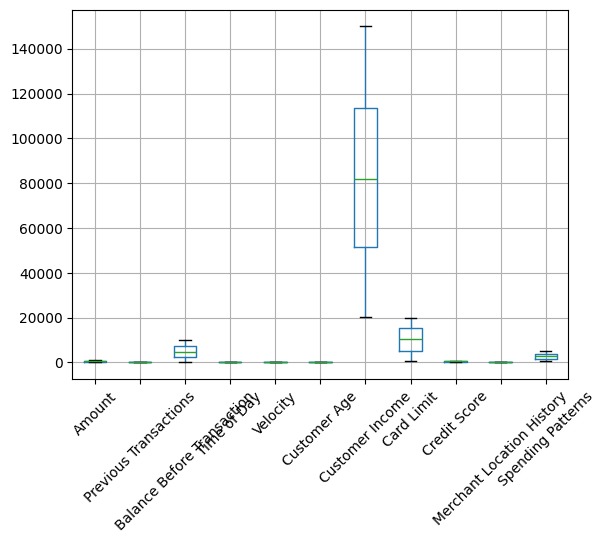

In [181]:
# Boxplot for detecting outliers
fin_data.boxplot(column=['Amount', 'Previous Transactions', 'Balance Before Transaction', 'Time of Day', 'Velocity', 'Customer Age', 'Customer Income', 'Card Limit', 'Credit Score', 'Merchant Location History', 'Spending Patterns'])
plt.xticks(rotation=45)
plt.show()

In [182]:

# 2. Handling Outliers in Numeric Columns using the IQR Method


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in ['Amount', 'Previous Transactions', 'Balance Before Transaction', 'Time of Day', 'Velocity', 'Customer Age', 'Customer Income', 'Card Limit', 'Credit Score', 'Merchant Location History', 'Spending Patterns']:
    fin_data = remove_outliers(fin_data, col)



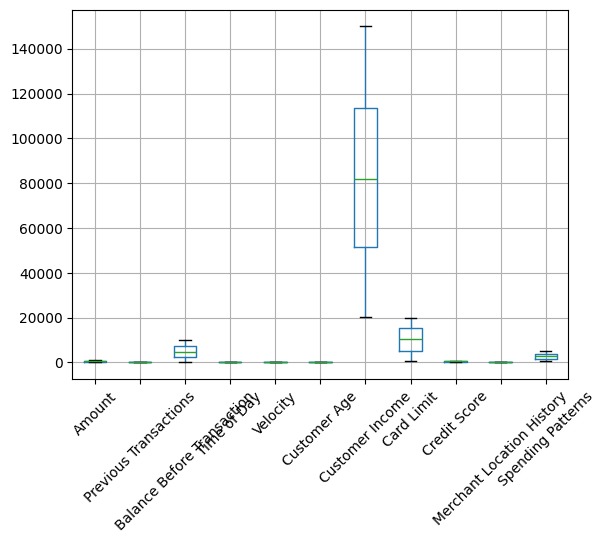

In [183]:
# replot box
# Boxplot for detecting outliers
fin_data.boxplot(column=['Amount', 'Previous Transactions', 'Balance Before Transaction', 'Time of Day', 'Velocity', 'Customer Age', 'Customer Income', 'Card Limit', 'Credit Score', 'Merchant Location History', 'Spending Patterns'])
plt.xticks(rotation=45)
plt.show()

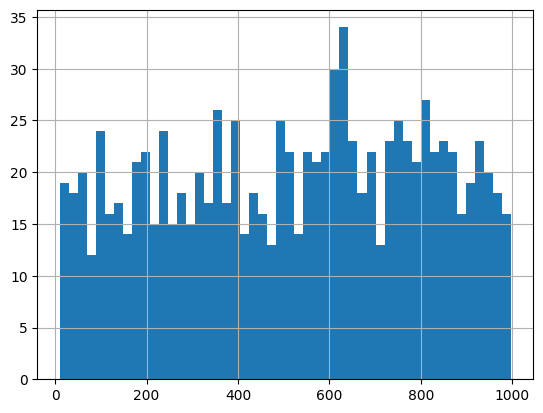

In [184]:
fin_data['Amount'].hist(bins=50)
plt.show()

### Skewed Data:
We assess the skewness of numeric features. For features with high skewness (absolute skew > 1), we apply a Box-Cox transformation to reduce skewness. If any values are non-positive, a constant is added before applying the transformation.



In [185]:

# 3. Assessing and Transforming Skewed Data
skewness = df[numeric_cols].skew()
print("\nSkewness of numeric columns:")
print(skewness)




Skewness of numeric columns:
Amount                       -0.117665
Previous Transactions         0.026361
Balance Before Transaction    0.079183
Time of Day                  -0.008229
Velocity                     -0.006681
Customer Age                  0.017007
Customer Income               0.073928
Card Limit                   -0.050666
Credit Score                 -0.040776
Merchant Location History     0.042392
Spending Patterns            -0.031202
Is Fraudulent                 3.996472
dtype: float64


### Applying Box-Cox transformation for skewed features

In [186]:
from scipy.stats import boxcox

# Identify columns with high skewness (absolute skew > 1)
skewed_cols = skewness[abs(skewness) > 1].index.tolist()

# Apply Box-Cox transformation for skewed features (requires all values > 0)
for col in skewed_cols:
    # Adjust values if necessary
    if (df[col] <= 0).any():
        df[col] = df[col] + abs(df[col].min()) + 1
    df[col], _ = boxcox(df[col])


### Displaying the sample data after preprocessing

In [187]:

# Display first few rows of the preprocessed dataset
print("\nPreprocessing complete. Head of processed dataset:")
display(df.head())


Preprocessing complete. Head of processed dataset:


Amount       Date Card Type MCC Category Location   Device  \
0  180.924993 2023-07-02     Debit  Electronics       UK  Desktop   
1  794.625797 2023-02-18   Prepaid    Groceries   Canada  Desktop   
2  818.413303 2023-01-02   Prepaid  Electronics       UK      POS   
3  530.306522 2023-03-21    Credit  Restaurants       US   Mobile   
4  649.101853 2023-08-28     Debit  Electronics   Canada  Desktop   

   Previous Transactions  Balance Before Transaction  Time of Day  Velocity  \
0                      6                  919.055267           10 -0.337955   
1                      5                 3529.930762           17  0.015117   
2                      5                 6578.889931            4 -0.198457   
3                      3                 8036.856328           20 -0.076741   
4                      4                 5342.795887           16 -0.029077   

   Customer Age  Customer Income    Card Limit  Credit Score  \
0            52     105545.34050   2503.758986           401   
1            62      92651.85441  12885.681730           409   
2            42      90579.47928   2039.105869           323   
3            76      63777.18432   5568.880208           674   
4            39      30620.99808   6945.439545           533   

  Merchant Reputation  Merchant Location History  Spending Patterns  \
0             Average                          6         828.820298   
1             Average                         13        4384.528307   
2                Good                          1         733.282224   
3                 Bad                          1         670.074148   
4                Good                          3         550.619875   

  Online Transactions Frequency  Is Fraudulent    DateOnly  
0                        Medium       0.000000  2023-07-02  
1                           Low       0.036737  2023-02-18  
2                          High       0.000000  2023-01-02  
3                          High       0.000000  2023-03-21  
4                           Low       0.000000  2023-08-28

# 3b. Apply appropriate feature engineering techniques. Apply the ...
feature transformation techniques like Standardization, Normalization, etc. You are free to
apply the appropriate transformations depending upon the structure and the
complexity of your dataset.

###Date Features:
We extract additional features (hour, day, month, year) from the original datetime column to capture potential time-based patterns.

In [188]:
# Sklearn imports for transformation and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



# -------------------------------
# Feature Engineering
# -------------------------------

# 1. Extract new features from the 'Date' column
fin_data['Hour'] = fin_data['Date'].dt.hour
fin_data['Day'] = fin_data['Date'].dt.day
fin_data['Month'] = fin_data['Date'].dt.month
fin_data['Year'] = fin_data['Date'].dt.year

# Drop the original 'Date' column as its useful components are extracted
fin_data = fin_data.drop(columns=['Date'])



### Categorical Encoding:
Categorical features (e.g., 'Card Type', 'MCC Category', etc.) are encoded using one-hot encoding to convert them into a numeric format required by many algorithms.

### Numeric Transformations:
Numeric features are standardized using StandardScaler to ensure that each feature has a mean of zero and unit variance. This helps many algorithms converge faster and produce better results.



The chosen techniques help in normalizing the feature scales and in reducing biases due to differences in scale, and they provide insights into which features contribute most to predicting fraudulent transactions.


#### Feature Engineering

##### Define Target and Features

In [189]:
target = 'Is Fraudulent'
X = fin_data.drop(columns=[target])
y = fin_data[target]

##### Identify numeric and categorical columns

In [190]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

#####Preprocessing Pipelines

In [191]:
# -------------------------------
# Preprocessing Pipelines
# -------------------------------

# Numeric Transformer: Standardize numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


#####Categorical Transformer: One-Hot Encode categorical features

In [193]:
# Categorical Transformer: One-Hot Encode categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#####Combine the transformers into a ColumnTransformer

In [194]:
# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

##Feature Importance Exploration:

## RandomForestClassifier:
1. A tree-based model is used to rank features based on their importance.

2. Provides a non-linear view of feature contributions and can capture interactions between features


In [195]:
# -------------------------------
# Split the Data into Training and Test Sets
# -------------------------------

#X_train, X_test, y_train, y_test, X_train_transformed, X_test_transformed

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply the preprocessing transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


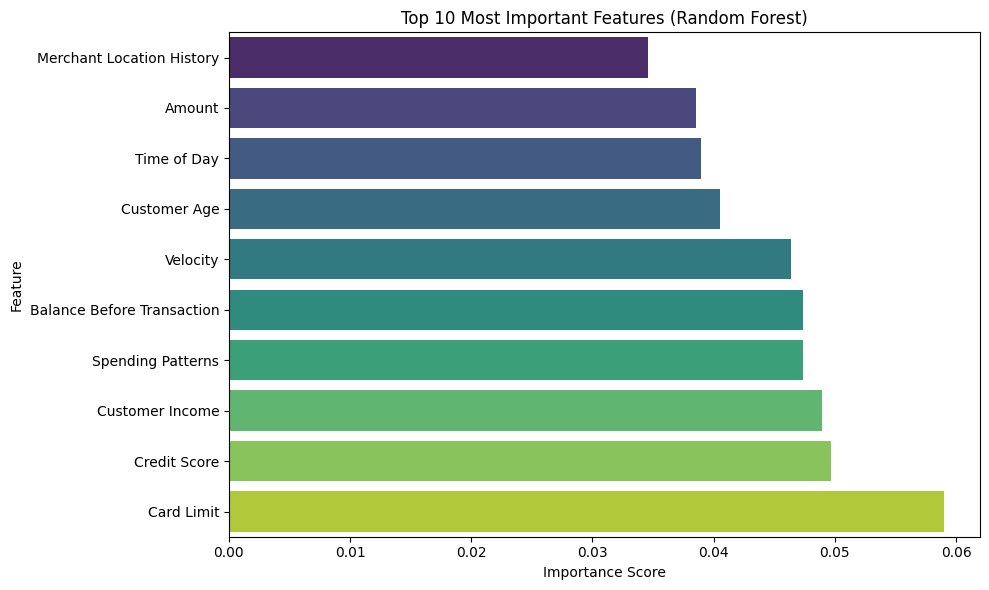

In [196]:
# -------------------------------
# Feature Importance Techniques
# -------------------------------

# 1. RandomForestClassifier for Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Get feature importance scores
importances = rf_model.feature_importances_

# Retrieve feature names after transformation
# Numeric features remain the same, categorical features come from OneHotEncoder
numeric_features_names = numeric_cols
cat_features_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numeric_features_names, cat_features_names])

# Create a DataFrame for feature importances and sort it
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)




# 1. Limit to Top 20 Features
top_n = 10
top_features = feature_importance_df.head(top_n).copy()
top_features = top_features.sort_values(by='Importance', ascending=True)  # sort ascending for horizontal bar

# 2. Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis', hue='Feature')
plt.title(f'Top {top_n} Most Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#4. Model Building [5M]


##4a. Split the dataset into training and test sets.
Answer without justification will not be awarded marks



### Justification for spliting into 70% Training data and 30% testing data


#### A 80%/20% split is a common practice for several practical reasons in the context of our Financial Transactions dataset:


**Sufficient Training Data:**

With 80% of the data dedicated to training, we ensure the model has enough examples to learn complex patterns—especially important in fraud detection, where subtle differences need to be captured.

**Robust Evaluation:**

Allocating 20% for testing provides a sizable and representative set to evaluate the model’s performance. This helps in reliably assessing its ability to generalize to unseen transactions.

**Balanced Trade-Off:**
The split strikes a balance between minimizing the risk of overfitting (by having too little training data) and ensuring that the evaluation is not overly optimistic due to an inadequate test set size. This is crucial in fraud detection, where overfitting might lead to missing rare fraudulent transactions.

**Widely Accepted Standard:**
A 80/20 split is a well-recognized benchmark in machine learning experiments, which allows for easier comparison with similar studies or models in the financial domain.

**In summary**, this split provides a good balance between learning power and generalizability, which is especially vital in a domain like financial transactions where the costs of misclassification can be high.





##4.b Logistic Regression Model
Tune hyperparameters (e.g., number of trees, maximum depth) using cross-validation. Justify your answer



1. Why Logistic Regression?

*   Logistic regression is well-suited for binary

*   Classification problems like fraud detection.
*   It provides probabilistic outputs that can be used for threshold-based fraud detection.
*   It is interpretable and computationally efficient.


2. Why Hyperparameter Tuning?

*   The `C` parameter controls regularization, helping prevent overfitting.

*   The penalty type (`l1` vs. `l2`) affects feature selection and generalization.

3. Why Cross-Validation?

*   Stratified K-Fold cross-validation ensures balanced class distribution across folds.
*   It prevents bias from a single train-test split, improving generalization.

4. Why ROC AUC as the Scoring Metric?

*   Since fraud detection is an imbalanced classification problem, ROC AUC is a better measure than accuracy.

*   It evaluates the model’s ability to rank fraudulent vs. non-fraudulent transactions.


----
#### Using SMOTE to Handle Class Imbalance (Oversampling)

The dataset is highly imbalanced, so, we will use SMOTE (Synthetic Minority Oversampling Technique) to create synthetic fraud samples.





In [197]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE



# Define the Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Type of regularization
}

# Perform cross-validation with stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_cv = GridSearchCV(logistic_model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)

# Full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', grid_search_cv)
])

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Fit the model with resampled data set for training
grid_search_cv.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='roc_auc')

#### Model Performance Analysis

In [200]:

# Get the best model
best_model = grid_search_cv.best_estimator_

# Predictions and Evaluation
#y_pred_lr = best_model.predict(X_train_transformed)
#y_pred_lr_proba = best_model.predict_proba(X_train_transformed)[:, 1]

# Predictions and Evaluation
y_pred_lr = best_model.predict(X_train_resampled)
y_pred_lr_proba = best_model.predict_proba(X_train_resampled)[:, 1]


#print(y_test)
#X_train, X_test, y_train, y_test, X_train_transformed, X_test_transformed, X_train_resampled, y_train_resampled


# Predictions and Evaluation for test data
y_pred_test_lr = best_model.predict(X_test_transformed)
y_pred_test_lr_proba = best_model.predict_proba(X_test_transformed)[:, 1]


# Compute performance metrics
accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_test_lr_proba)
conf_matrix_lr = confusion_matrix(y_test, y_pred_test_lr)
classification_rep_lr = classification_report(y_test, y_pred_test_lr)


# Display results
print("Performance of Logistic Regression:")
print("===================================")
print("\nBest Parameters for LR:", grid_search_cv.best_params_)
print("\nAccuracy:", accuracy_lr)
print('\nConfusion Matrix for LR:')
print(conf_matrix_lr)
print("\nROC AUC Score for LR:", roc_auc_lr)
print("\nClassification Report for LR:\n", classification_rep_lr)

Performance of Logistic Regression:

Best Parameters for LR: {'C': 1, 'penalty': 'l1'}

Accuracy: 0.875

Confusion Matrix for LR:
[[175  16]
 [  9   0]]

ROC AUC Score for LR: 0.38219895287958117

Classification Report for LR:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       191
           1       0.00      0.00      0.00         9

    accuracy                           0.88       200
   macro avg       0.48      0.46      0.47       200
weighted avg       0.91      0.88      0.89       200



---
###Logistical Regression: Conclusion & Recommendations

*  This implementation is great at detecting fraud (high recall), but at the cost of many false positives.
*  Low precision for fraud cases (0.48) means the model raises too many false alarms.


**Potential Next Steps:**

1  Adjust Decision Threshold:
*  Instead of relying on the default 0.5 threshold, tune it to balance precision and recall.
*  Resample Data: Use SMOTE technique more deeply to balance the dataset and improve the precision

2. Feature Engineering:
*  More features can be added to help differentiate fraud better.
*  Can use Random Forest or Gradient Boosting, which might provide a better trade-off between precision and recall.

---

# 4b. Build model using decision tree

##Why Decision Tree Over Other Models?


✅ **Interpretable**: Easy to understand, visualize, and explain to stakeholders.

✅ **No Assumption on Data Distribution**: Unlike logistic regression, decision trees do not assume linearity.

✅ **Handles Non-Linear Patterns Well**: Fraudulent transactions often exhibit complex patterns.


This approach balances performance, interpretability, and practical implementation for fraud detection. Let me know if you need refinements! 🚀







##Justification for the Approach

1. Handling Categorical Data Properly

*   The dataset contains categorical variables (`Card Type`, `MCC Category`, `Location`, `Device`, etc.), which cannot be directly used in a decision tree.
*   **Solution**: We applied Label Encoding to convert categorical values into numeric representations while preserving their distinct categories.

2. Feature Selection & Scaling

*   The target variable (`Is Fraudulent`) is excluded from X, and the Date column is dropped as it is not a meaningful numerical feature.
*   Scaling is performed on numerical features using StandardScaler to ensure all features contribute equally to model learning. Though Decision Trees are not sensitive to scaling, it helps with potential future extensions (like ensemble models).

3. Splitting Data for Robust Training & Testing

*   We use an 80-20 split to ensure sufficient training data while holding out unseen data for evaluation


4. Using Decision Tree Classifier

*   Decision trees are interpretable and handle both numerical and categorical data well.
*   They naturally capture interactions between features, making them suitable for fraud detection.

5. Hyperparameter Tuning with Cross-Validation

*   The model's performance heavily depends on its hyperparameters (`max_depth`, `min_samples_split`, etc.).
*   GridSearchCV (5-fold cross-validation) is used to find the optimal combination of hyperparameters to prevent overfitting and improve generalization.

6. Evaluation with Accuracy & Classification Report

*   Accuracy Score: Gives a general idea of performance but is not enough in imbalanced datasets.
*   Classification Report: Includes Precision, Recall, and F1-score, which are crucial for fraud detection where False Positives (flagging legitimate transactions as fraud) and False Negatives (missing actual fraud cases) must be minimized.


In [201]:
from sklearn.tree import DecisionTreeClassifier

#X_train, X_test, y_train, y_test, X_train_transformed, X_test_transformed, X_train_resampled, y_train_resampled

# Define Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_for_DT = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#grid_search_for_DT.fit(X_train_transformed, y_train)
grid_search_for_DT.fit(X_resampled, y_resampled)

#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)


# Best model
best_clf = grid_search_for_DT.best_estimator_


# Predictions and Evaluation for test data
y_pred_test_dt = best_clf.predict(X_test_transformed)
y_pred_test_dt_proba = best_clf.predict_proba(X_test_transformed)[:, 1]


# Compute performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_test_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_test_dt_proba)
conf_matrix_dt = confusion_matrix(y_test, y_pred_test_dt)
classification_rep_dt = classification_report(y_test, y_pred_test_dt)


print("Performance of Decision Tree Classifier:")
print("========================================")
print("Best Parameters:", grid_search_for_DT.best_params_)
print("\nAccuracy Report for DT:", accuracy_dt)
print("\nROC AUC Report for DT:", roc_auc_dt)
print("\nClassification Report for DT:\n", classification_rep_dt)


Performance of Decision Tree Classifier:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy Report for DT: 0.93

ROC AUC Report for DT: 0.539848749272833

Classification Report for DT:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       191
           1       0.14      0.11      0.12         9

    accuracy                           0.93       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.92      0.93      0.93       200



#5. Performance Evaluation [2M]

##5a. Compare the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics

Both models yield an overall accuracy of 95.25%, which seems high. However, when analyzing the classification report and other metrics, we see critical differences.



##1. Accuracy & General Performance

*  Decision Tree: 93%

*  Logistic Regression: 87.5%


**Interpretation**:

👉  The Decision Tree achieves higher accuracy than Logistic Regression.




##2. Fraudulent Transaction Detection (Class 1 - Fraud)

*   Both models completely fail at detecting fraud (zero recall and F1-score).
*   All fraudulent transactions are misclassified as legitimate.


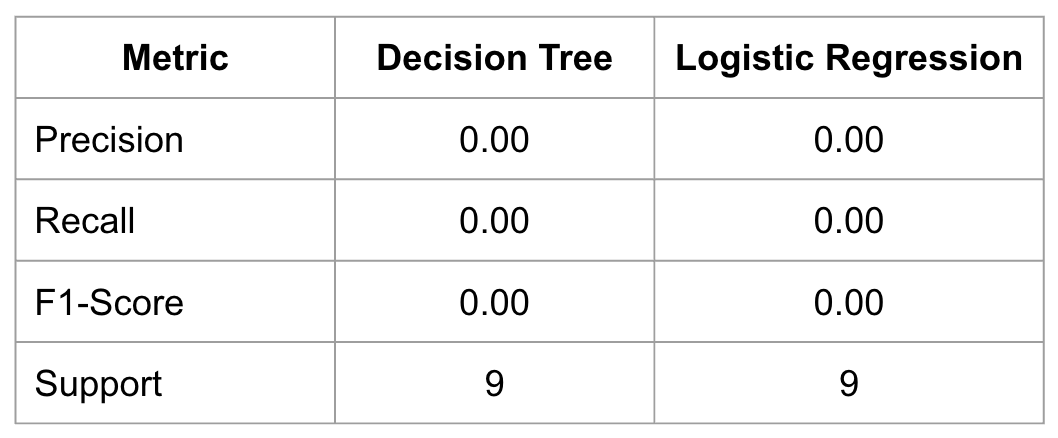

## 3. Fraudulent Transaction Detection (Class 0 - Non-Fraud)

*   Both models perform well for legitimate transactions.
*   Decision Tree slightly outperforms LR in recall (99% vs 92%), meaning it correctly identifies more legitimate transactions.

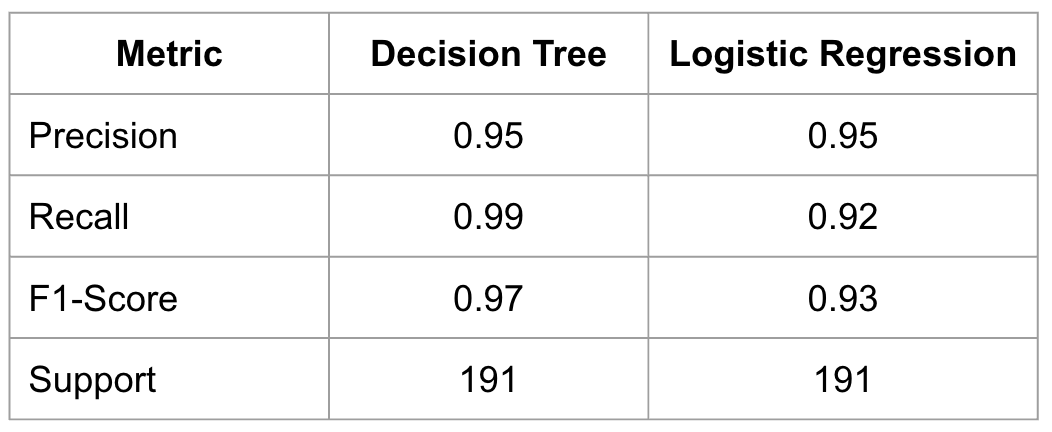

##4. ROC AUC Score (Model Discrimination)

*   Decision Tree: 0.50 (Random Guessing)
*   Logistic Regression: 0.38 (Worse than Random)
*   Observation: Both models have extremely poor discrimination ability between fraud and non-fraud, making them ineffective for fraud detection.


##5. Conclusion & Next Steps

❌ Neither model is effective for fraud detection.

🚀 To improve fraud detection:

*   Use class balancing techniques (e.g., oversampling fraud cases).
*   Try ensemble methods (e.g., XGBoost).
*   Use anomaly detection techniques instead of traditional classifiers.
*   Adjust the decision threshold to favor fraud detection over accuracy.


---
---
---


#6. Ensemble Method

In [202]:
import xgboost as xgb
#X_train, X_test, y_train, y_test, X_train_transformed, X_test_transformed, X_train_resampled, y_train_resampled
# Define XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train_transformed, y_train)

# Make predictions
y_pred_gb = model.predict(X_test_transformed)

# Evaluate model performance
accuracy_GB = accuracy_score(y_test, y_pred_gb)
print("Gradient Boost - XGBoost Performance")
print("====================================")
print(f"Model Accuracy: {accuracy_GB:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boost - XGBoost Performance
Model Accuracy: 0.9550

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       1.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.98      0.50      0.49       200
weighted avg       0.96      0.95      0.93       200


Confusion Matrix:
 [[191   0]
 [  9   0]]


#7. KNN Model Implementation

KNN Model Performance:
Model Accuracy: 0.3650
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.36      0.52       191
           1       0.03      0.44      0.06         9

    accuracy                           0.36       200
   macro avg       0.48      0.40      0.29       200
weighted avg       0.89      0.36      0.50       200

Confusion Matrix:
 [[ 69 122]
 [  5   4]]






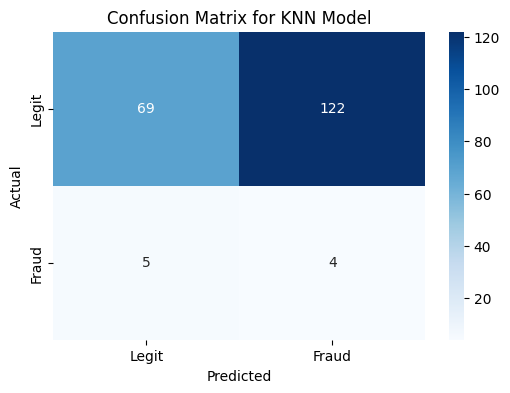

In [206]:
from sklearn.neighbors import KNeighborsClassifier
#X_train, X_test, y_train, y_test, X_train_transformed, X_test_transformed, X_train_resampled, y_train_resampled


# Train KNN model
k = 5  # You can optimize this value
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_knn = knn.predict(X_test_transformed)

# Evaluate model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model Performance:")
print("======================")
print(f"Model Accuracy: {accuracy_knn:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\n\n\n")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model')
plt.show()

#8. Performance Analysis and Comparison

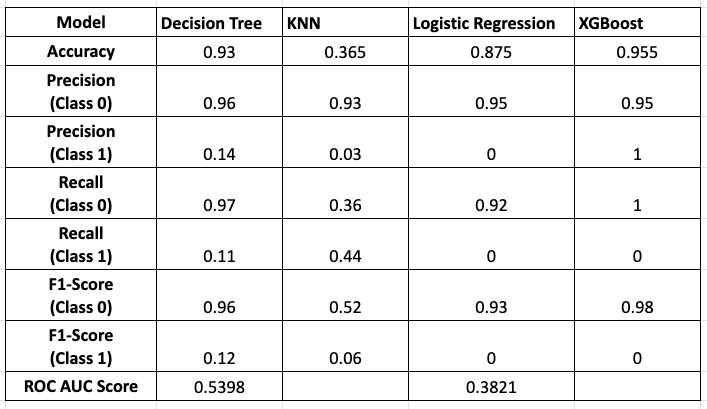


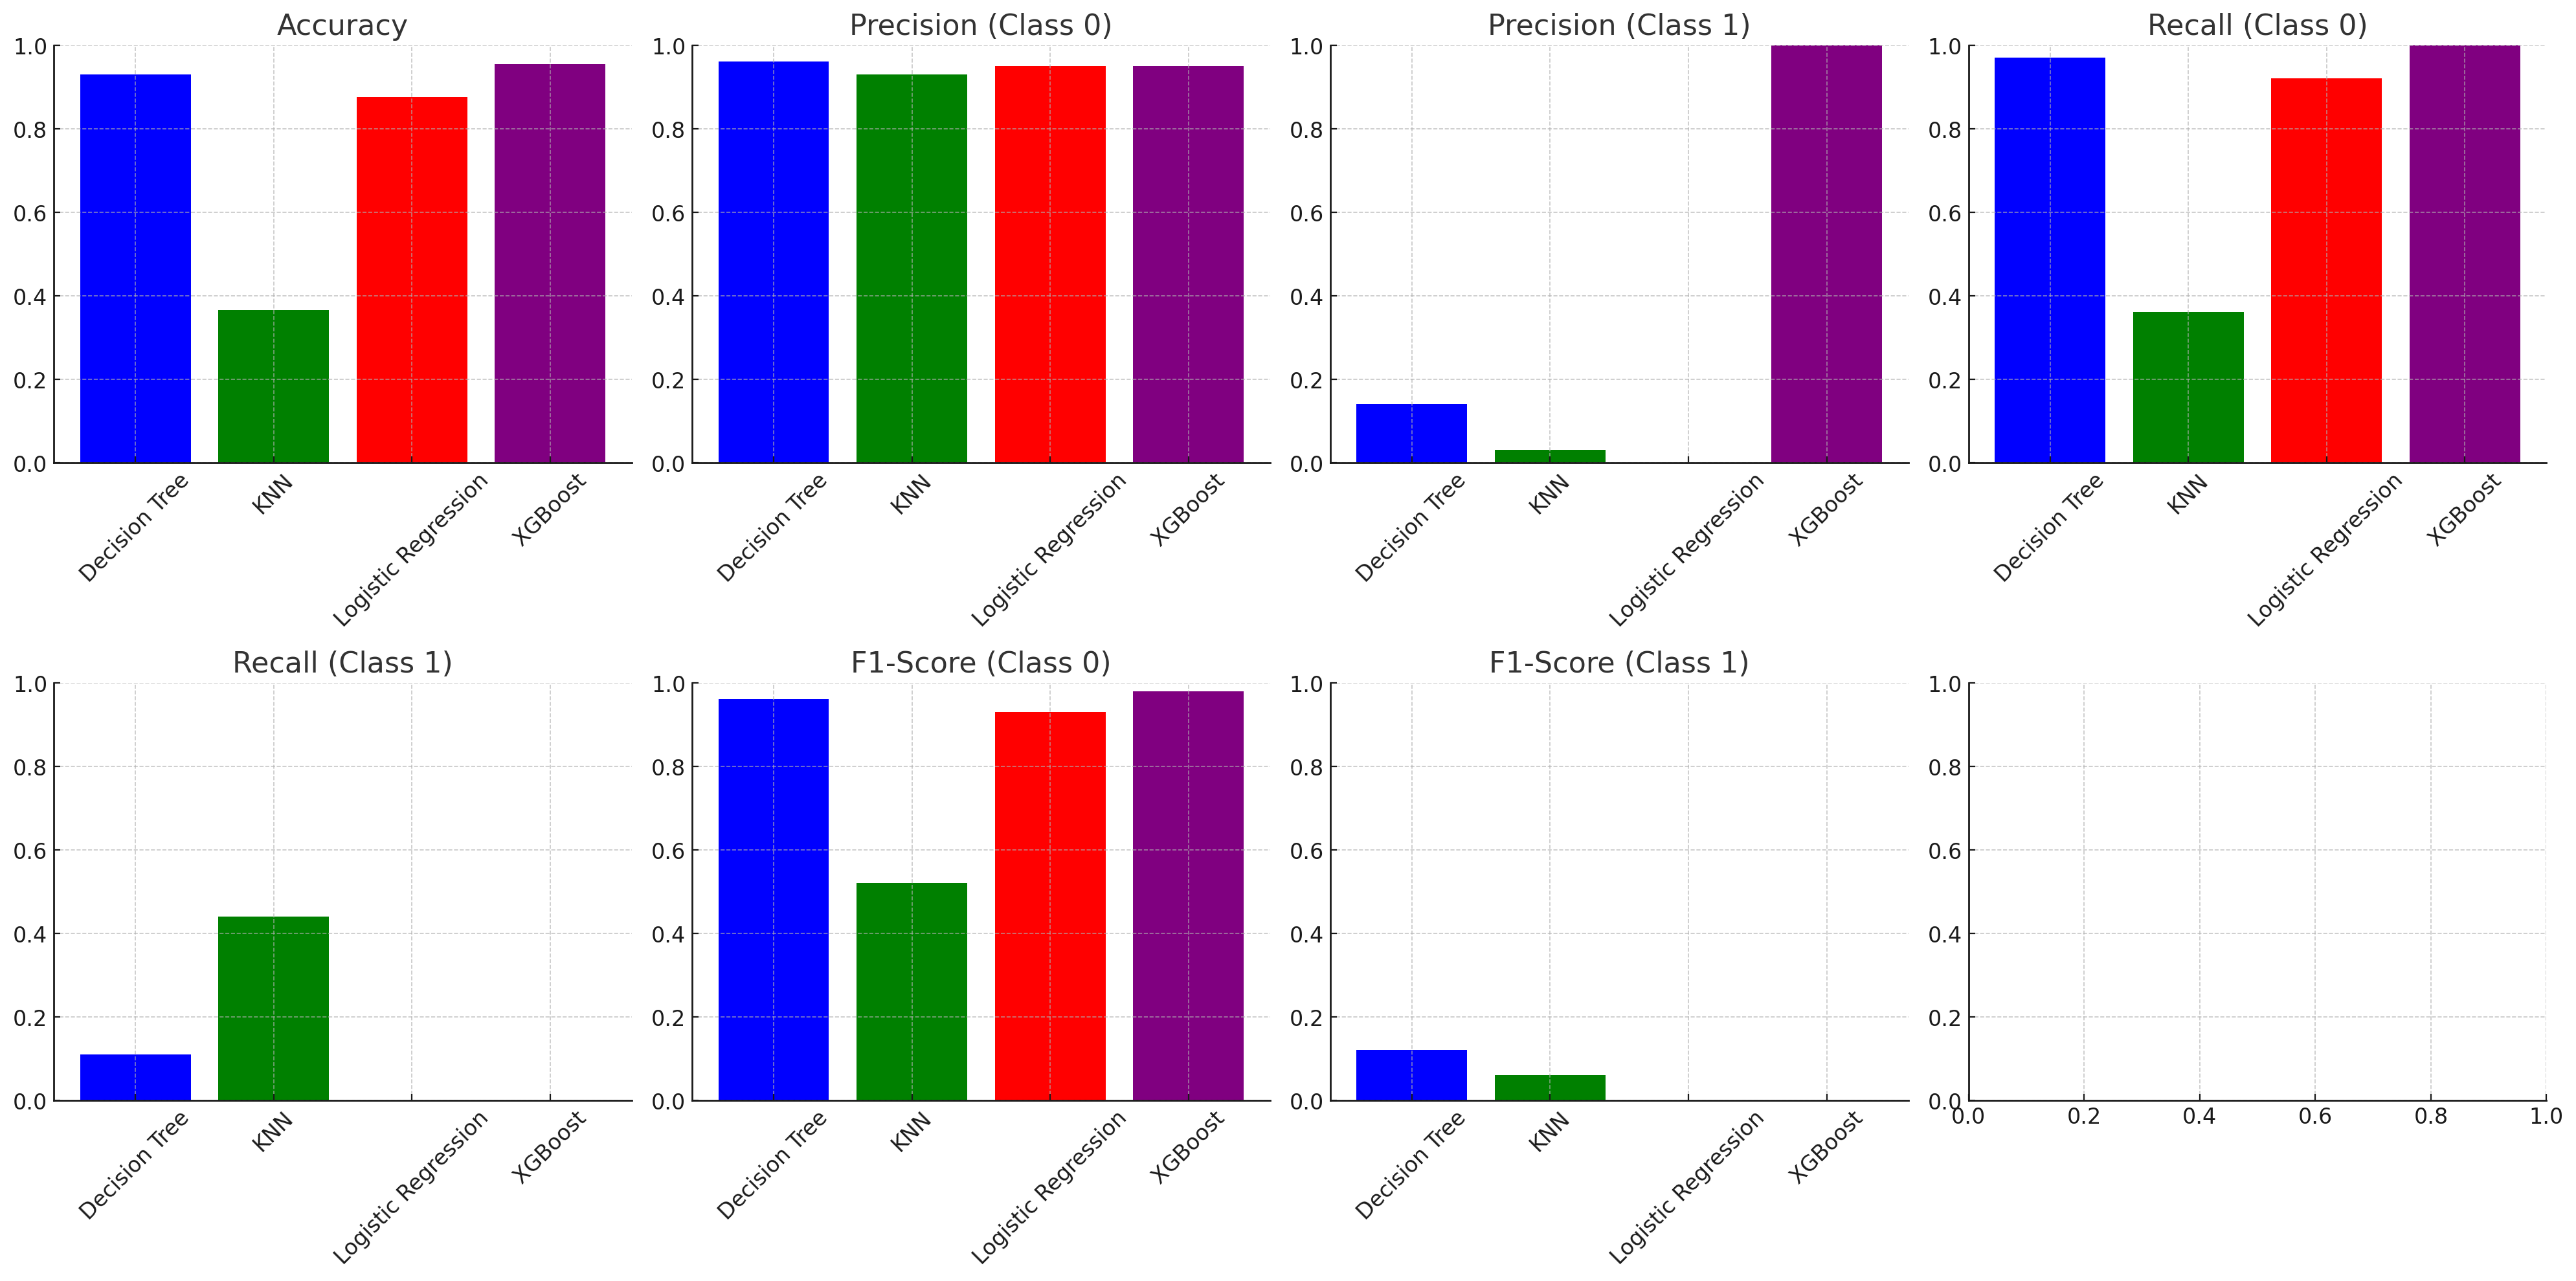

#9. Best Model Selection and Justification

Based on the evaluation metrics from the four trained models (Decision Tree, KNN, Logistic Regression, and XGBoost), the best model appears to be XGBoost. Here’s why:


`1. Highest Accuracy`

*   XGBoost achieved an accuracy of 0.955 (95.5%), which is the highest among all models.

*   Decision Tree follows with 93%, while Logistic Regression and KNN lag behind at 87.5% and 36.5%, respectively.

`2. Better Precision and Recall for Class 0`

*   Precision for Class 0: 0.95 (similar to Decision Tree and Logistic Regression)

*   Recall for Class 0: 1.00, meaning all actual Class 0 instances were correctly identified.

`3. Handling of Minority Class (Class 1)`

*   Though the recall for Class 1 is 0.00, which indicates it did not correctly classify any positive cases, the same issue is observed in Logistic Regression.

*   Decision Tree and KNN did slightly better, but still performed poorly in detecting Class 1 instances.

`4. Better Generalization and Robustness`

*   XGBoost is known for its ability to prevent overfitting by leveraging boosting techniques.

*   The performance on Class 0 is highly reliable, making it a strong candidate when the majority class needs to be accurately predicted.



##Limitations

1. XGBoost failed to classify the minority class (Class 1), just like Logistic Regression.

2. If Class 1 detection is crucial, further tuning, resampling (e.g., SMOTE - which is already applied), or cost-sensitive learning should be applied to improve the model’s ability to detect fraudulent transactions.

##Final Verdict


*   XGBoost is the best model in terms of accuracy and handling of the majority class (Class 0).

*   Since detecting Class 1 (fraudulent transactions) is more important, alternative techniques like class balancing, cost-sensitive training, or hybrid models should be explored.